In [1]:
import os
from pathlib import Path
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
os.chdir("../")

In [4]:
%pwd

'/Volumes/T7/Box_office_prediction_project/BoxOfficePrediction'

Necesary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

Data Path

In [6]:
movies_path = 'artifacts/data_ingestion/tmdb_5000_movies.csv'
credits_path = 'artifacts/data_ingestion/tmdb_5000_credits.csv'

Load Data

In [7]:
movies_db = pd.read_csv(movies_path)
movies_db.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
credits_db = pd.read_csv(credits_path)
credits_db.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Merge tables

In [9]:
cinema_db = movies_db.merge(credits_db, on='title')
cinema_db.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Priliminary Analysis

In [10]:
print("Dimension Of Data : ", cinema_db.shape)
print("Columns in the Database : \n")
print(cinema_db.columns)

Dimension Of Data :  (4809, 23)
Columns in the Database : 

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


# Understanding Features and their formats

## Numerical Features

In [11]:
numerical_features = [feature for feature in cinema_db.columns if cinema_db[feature].dtypes!="O"]

print("Number of Numerical Features : ",len(numerical_features))

# visualise the numerical variables
cinema_db[numerical_features].head()

Number of Numerical Features :  8


,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,19995
1,300000000,285,139.082615,961000000,169.0,6.9,4500,285
2,245000000,206647,107.376788,880674609,148.0,6.3,4466,206647
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106,49026
4,260000000,49529,43.926995,284139100,132.0,6.1,2124,49529


### Inference

- There are 8 numerical features in which "id, movie_id " are just used ti identify the filim uniquely and are not useful for prediction
- These have to be removed
 

## Objective 1

- Removing 'id' and 'movie_id' columns

In [12]:
cinema_db.drop(['id','movie_id'],axis=1,inplace=True)
numerical_features = [feature for feature in cinema_db.columns if cinema_db[feature].dtypes!="O"]

print("Number of Numerical Features : ",len(numerical_features))

# visualise the numerical variables
cinema_db[numerical_features].head()

Number of Numerical Features :  6


,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


## Temporial Features(Eg: Datetime Variables)

- 'release_date' is the only temporial variable in our dataset

- #### Effect of release date on revenue:
    - Practically filims run good on specific months in a year which might be due to holidays, etc..
    - And the revenue is highly related to ticket price in the time of release. So we need to know which year the filim was released and the ticket prices at the time of release to have a fair comparision between filims released across time.

In [13]:
print("Format of the values of release data are as : ",cinema_db['release_date'][1])
print("It is in the ",cinema_db['release_date'].dtype," datatype")

Format of the values of release data are as :  2007-05-19
It is in the  object  datatype


Understanding the Impact of month of release on revenue

Text(0.5, 1.0, 'Revenue vs Month of release')

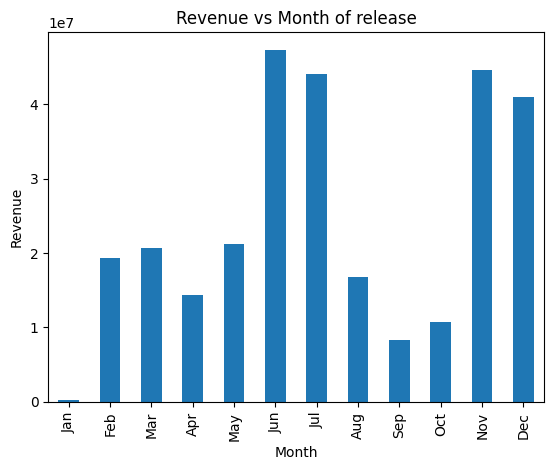

In [14]:
dataset = cinema_db[['release_date','revenue']]

# Convert 'release_date' to datetime format, to extract month easily
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

dataset.groupby(dataset['release_date'].dt.month)['revenue'].median().plot(kind='bar')

plt.xlabel("Month")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel("Revenue")
plt.title("Revenue vs Month of release")


Getting Earliest and Latest release in the database by year

In [15]:
dataset['release_year'] = dataset['release_date'].dt.year

earlist_release_in_year = dataset['release_year'].min()
latest_release_in_year = dataset['release_year'].max()

print("earliest year in databasse : ", earlist_release_in_year)
print("latest year in database :", latest_release_in_year)

earliest year in databasse :  1916.0
latest year in database : 2017.0


### Inference
- We can clearly observe that, movies released in Jan, Aug, Sep, Oct make less revenue and movies released in Jun, Jul, Nov, Dec made more.
- So we can observe that revenue is heavily impacted by the month of release and we have to treat it as a seperate feature to train our model.
- Databse Consist of filims between 1916 and 2017

## Objective 2

- Mont of release as seperate attribute (as it impact revenue)
- Year of release as seperate attribute (to be able to get ticket price based on year)
- Change datatype of year to Int64.
- Remove 'release_date' attribute

In [16]:
import calendar

extract month

In [17]:
# Convert 'release_date' to datetime format
cinema_db['release_date'] = pd.to_datetime(cinema_db['release_date'])

# Extract month from 'release_date'
cinema_db['release_month'] = cinema_db['release_date'].dt.month

# Map month numbers to month names
cinema_db['release_month'] = cinema_db['release_month'].apply(lambda x: calendar.month_abbr[int(x)] if not np.isnan(x) else np.nan)

extract year

In [18]:
cinema_db['release_year'] = cinema_db['release_date'].dt.year

# Convert non-null values in release_year column to integers
cinema_db['release_year'] = pd.to_numeric(cinema_db['release_year'], errors='coerce').astype('Int64')

cinema_db['release_year'].head()


0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: Int64

remove 'release_date' attribute

In [19]:
cinema_db.drop(['release_date'],axis=1,inplace=True)

cinema_db.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_month,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Dec,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",May,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Oct,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Jul,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Mar,2012


## Ticket Prices table
- As we have discussed that we need to consider the ticket price at the time of release to have fair comparision between filims released across time

In [20]:
ticket_price_link = 'artifacts/data_ingestion/ticket_prices.csv'
ticket_price_db = pd.read_csv(ticket_price_link)
ticket_price_db.head()

,year,avg_ticket_price
0,2018,$9.11
1,2017,$8.97
2,2016,$8.65
3,2015,$8.43
4,2014,$8.17


In [21]:
ticket_price_db['avg_ticket_price'].dtype

dtype('O')

### Inference
- We have data in format of year vs average ticket price in dollars for that year.
- Prices are of object data type with '$' and we need to convert into folat for further analysis or feature engineering

## Objective 3
- Convert average ticket prices into float datatype.
- rename year column to release_year to merge
- Convert year to Int64 type
- Join the cinema_db with ticket_price_db based on year
- Remove the year attribute as it not significant after we got prices 

Convert avg_ticket_price to float

In [22]:
ticket_price_db['avg_ticket_price'] = ticket_price_db['avg_ticket_price'].str.replace('$','').astype(float)
ticket_price_db['avg_ticket_price'].head()

0    9.11
1    8.97
2    8.65
3    8.43
4    8.17
Name: avg_ticket_price, dtype: float64

Rename year column and change datatype

In [23]:
ticket_price_db = ticket_price_db.rename(columns={'year':'release_year'})
ticket_price_db['release_year'] = pd.to_numeric(ticket_price_db['release_year'],errors='coerce').astype('Int64')
ticket_price_db.dtypes

release_year          Int64
avg_ticket_price    float64
dtype: object

Join the ticket prices to cinema_db on year

In [24]:
cinema_data = cinema_db.merge(ticket_price_db,on='release_year',how="left")
cinema_data[['release_year','avg_ticket_price','revenue']].head()

,release_year,avg_ticket_price,revenue
0,2009,7.50,2787965087
1,2007,6.88,961000000
2,2015,8.43,880674609
3,2012,7.96,1084939099
4,2012,7.96,284139100


In [25]:
cinema_db = cinema_data

In [26]:
cinema_db.drop(['release_year'],axis=1,inplace=True)
cinema_db.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_month,avg_ticket_price
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Dec,7.50
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",May,6.88
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Oct,8.43
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Jul,7.96
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Mar,7.96


## Categorical Features

In [27]:
def get_categorical_features(cinema_db):
    categorical_feature = [feature for feature in cinema_db.columns if cinema_db[feature].dtypes=='O']
    print("There are {} categorical features".format(len(categorical_feature)))
    return categorical_feature

categorical_feature = get_categorical_features(cinema_db=cinema_db)
cinema_db[categorical_feature].head()

There are 15 categorical features


,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,status,tagline,title,cast,crew,release_month
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Dec
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",May
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Oct
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Jul
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Mar


### Unwanted Columns
- We can practically observe that follwing columns dosent have any impact on the movie revenue,
    - homepage
    - original_title
    - title

- Whereas the are columns in table that might have impact on the revenue but are unique to each filim and have to be transformed using NLP techniques treatung them as future scope to improve the model, we might not want to use them now like,
    - tagline
    - overview
    - keywords
    
   

### Format Of Each valid Categorical Variable

In [28]:
invalid_features = ['homepage','original_title','title','tagline','overview','keywords']
valid_features = [feature for feature in cinema_db.columns if feature not in invalid_features and cinema_db[feature].dtypes=='O']
cinema_data = cinema_db[valid_features]
cinema_data.head()


,genres,original_language,production_companies,production_countries,spoken_languages,status,cast,crew,release_month
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Dec
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",May
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Oct
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Jul
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Mar


In [29]:
for feature in cinema_data.columns:
    print("The format of ",feature,"is :")
    print(cinema_data[feature][0])
    print("----------------")
    print()

The format of  genres is :
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
----------------

The format of  original_language is :
en
----------------

The format of  production_companies is :
[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]
----------------

The format of  production_countries is :
[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]
----------------

The format of  spoken_languages is :
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]
----------------

The format of  status is :
Released
----------------

The format of  cast is :
[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, 

## Objective 4

- remove all the unwanted Categorical columns

In [30]:
# cinema_db.drop(['homepage','original_title','title','tagline','overview','keywords'],axis=1,inplace=True)
# categorical_feature = get_categorical_features(cinema_db=cinema_db)
# cinema_db[categorical_feature].head()